In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Flatten, Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import pydot_ng
import graphviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("fer2013.csv")

In [4]:
labels=data.iloc[:,[0]].values

In [5]:
pixels=data['pixels']

In [6]:
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}
from tensorflow.keras.utils import to_categorical 
labels = to_categorical(labels,len(Expressions))

In [7]:
images = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
images=images/255.0
images = images.reshape(images.shape[0],48,48,1).astype('float32')

'Disgust'

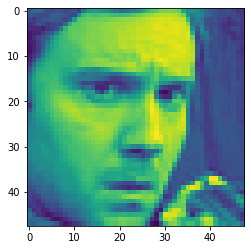

In [8]:
plt.imshow(images[0][:,:,0])
Expressions[labels[0][0]]

In [9]:
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [10]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.save
    
    return model 

In [12]:
keras.models.load_model
classes=7
model = create_convolutional_model(classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 32)        160       
                                                                 
 batch_normalization (BatchN  (None, 47, 47, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        8256      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       2

In [13]:
model.fit(train_images,train_labels,batch_size=105,epochs=30,verbose=2)

Epoch 1/30
274/274 - 235s - loss: 1.8552 - accuracy: 0.3394 - 235s/epoch - 857ms/step
Epoch 2/30
274/274 - 306s - loss: 1.4790 - accuracy: 0.4431 - 306s/epoch - 1s/step
Epoch 3/30
274/274 - 319s - loss: 1.3499 - accuracy: 0.4871 - 319s/epoch - 1s/step
Epoch 4/30
274/274 - 317s - loss: 1.2222 - accuracy: 0.5346 - 317s/epoch - 1s/step
Epoch 5/30
274/274 - 316s - loss: 1.1379 - accuracy: 0.5693 - 316s/epoch - 1s/step
Epoch 6/30
274/274 - 245s - loss: 1.0716 - accuracy: 0.5993 - 245s/epoch - 896ms/step
Epoch 7/30
274/274 - 237s - loss: 1.0010 - accuracy: 0.6280 - 237s/epoch - 865ms/step
Epoch 8/30
274/274 - 246s - loss: 0.9740 - accuracy: 0.6321 - 246s/epoch - 897ms/step
Epoch 9/30
274/274 - 242s - loss: 0.8738 - accuracy: 0.6749 - 242s/epoch - 885ms/step
Epoch 10/30
274/274 - 241s - loss: 0.7926 - accuracy: 0.7063 - 241s/epoch - 879ms/step
Epoch 11/30
274/274 - 241s - loss: 0.6982 - accuracy: 0.7427 - 241s/epoch - 881ms/step
Epoch 12/30
274/274 - 230s - loss: 0.6134 - accuracy: 0.7745 - 2

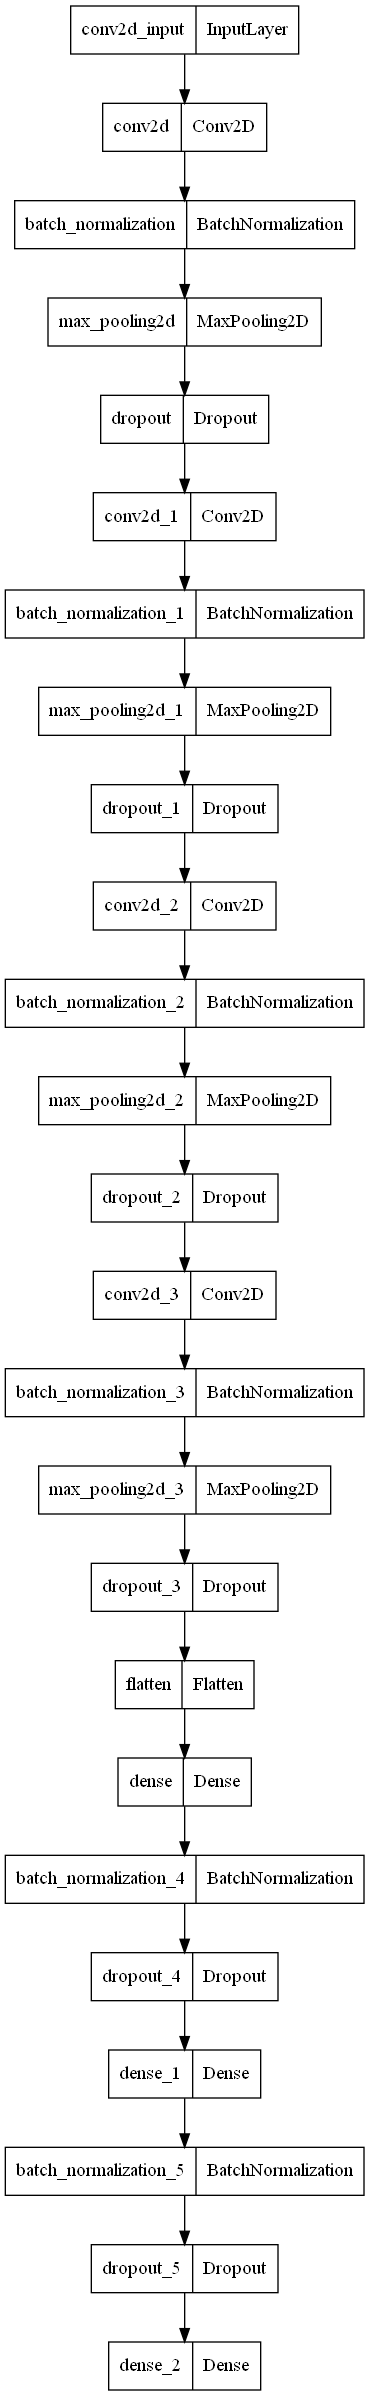

In [14]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model 
from keras.utils import np_utils

keras.utils.plot_model(model, to_file='final_model.png', show_layer_names=True)

In [15]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

Normalized confusion matrix
[[0.52757544 0.00520291 0.07388137 0.07075963 0.16753382 0.03746098
  0.11758585]
 [0.20754717 0.4245283  0.12264151 0.06603774 0.12264151 0.01886792
  0.03773585]
 [0.13717694 0.00198807 0.36779324 0.05069583 0.21769384 0.10735586
  0.11729622]
 [0.03647251 0.00108873 0.0190528  0.82090365 0.05280348 0.01360915
  0.05606968]
 [0.11340206 0.00317209 0.09595559 0.07454401 0.52339413 0.01982554
  0.16970658]
 [0.04630788 0.00125156 0.04881101 0.06382979 0.02628285 0.77722153
  0.03629537]
 [0.09602649 0.00165563 0.05546358 0.10182119 0.16639073 0.02069536
  0.55794702]]


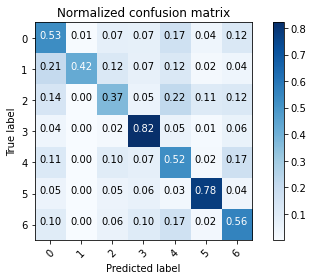

In [16]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)

cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [17]:
filename='model_weights.hdf5'
model.save_weights(filename,overwrite=True)

In [ ]:
filename='model_weights.hdf5'
model.load_weights(filename)

In [19]:
import cv2
import numpy as np
def make_prediction(unknown):
    unknown=cv2.resize(unknown,(48,48))
    unknown=unknown/255.0
    unknown=np.array(unknown).reshape(-1,48,48,1)
    predict=np.argmax(model.predict(unknown),axis = 1)
    return predict[0]  

def face_in_video():
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    cap=cv2.VideoCapture(0)
    while True:
        ret, img= cap.read()  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        
        for (x,y,w,h) in faces:
            sub_face = gray[y:y+h, x:x+w]
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            res=make_prediction(sub_face)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.5,(205,200,50),1,cv2.LINE_AA)
        cv2.imshow('img',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  

In [ ]:
face_in_video()